In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
boston_data=load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
x=df[['LSTAT']].values
x

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [7]:
y=boston_data.target

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
svr=SVR(gamma='auto')
svr.fit(x,y)

SVR(gamma='auto')

In [10]:
sort_idx=x.flatten().argsort()


In [11]:
sort_idx

array([161, 162,  40, 232, 192, 204,   3, 370, 195, 275, 282, 202, 256,
       226, 268, 283, 368, 163, 290, 274, 252, 253, 291,  98, 251, 166,
       369, 229, 280, 203, 228, 233,  57,   2, 196, 224, 277,  97,  39,
       194, 200, 186, 353, 308, 199, 188, 157, 281, 344, 225,  65, 191,
       292, 237, 299,  55, 182,  41, 279, 303, 298,   0, 193, 179, 325,
       190, 257, 243,   5, 231,  52, 364,  80,   4, 175, 189, 341, 351,
       160,  88,  72, 355, 503, 333, 183,  89,  56,  42, 349, 250, 262,
       311, 350, 348, 276, 300, 324, 326,  99,  93, 295, 177, 238, 347,
       227, 158, 306, 504,  85, 249, 254, 273,  16, 271, 198,  95, 187,
        70,  82,  62, 334,  74,  58, 321, 259, 178, 304, 482, 365, 287,
       343, 278, 320,  81, 261, 329, 239, 296, 159, 201,  43, 267,  83,
       307,  73, 180, 288, 223, 101, 322, 272, 481, 360, 258, 352, 332,
       284, 505, 313, 335,  64, 354, 234,  67, 264,  92,  91, 285,  13,
        53,  87,  15, 338, 293, 197, 342, 302,  37,  69,  90, 37

Text(0, 0.5, 'MEDV')

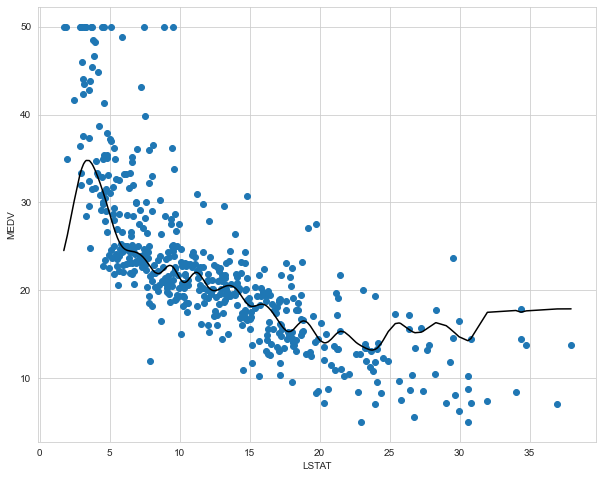

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(x[sort_idx],y[sort_idx])
plt.plot(x[sort_idx],svr.predict(x[sort_idx]),color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Linear Kernel

In [14]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [15]:
y_train_pred=svr.predict(x_train)

In [16]:
y_test_pred=svr.predict(x_test)

In [18]:
print('MSE train:{0:.4f},test: {1:.4f}'.\
format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train:41.8187,test: 36.8372


In [19]:
print('R^2 train:{0:.4f},R^2 test: {1:.4f}'.\
format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train:0.5242,R^2 test: 0.5056


# polynomial kernel

In [20]:
svr=SVR(kernel='poly',C=1e3,degree=2,gamma='auto')

In [21]:
svr.fit(x_train,y_train)

SVR(C=1000.0, degree=2, gamma='auto', kernel='poly')

In [22]:
y_train_pred=svr.predict(x_train)

In [23]:
y_test_pred=svr.predict(x_test)

In [24]:
print('MSE train:{0:.4f},test: {1:.4f}'.\
format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train:110.3334,test: 114.3676


In [25]:
print('R^2 train:{0:.4f},R^2 test: {1:.4f}'.\
format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train:-0.2553,R^2 test: -0.5349


## rbf

In [26]:
svr=SVR(kernel='rbf',C=1e3,gamma=0.1)

In [27]:
svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.1)

In [28]:
y_train_pred=svr.predict(x_train)

In [29]:
y_test_pred=svr.predict(x_test)

In [30]:
print('MSE train:{0:.4f},test: {1:.4f}'.\
format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train:27.5635,test: 26.7051


In [31]:
print('R^2 train:{0:.4f},R^2 test: {1:.4f}'.\
format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train:0.6864,R^2 test: 0.6416
